In [63]:
import pandas as pd
df = pd.read_csv("../dataset/train.csv")  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [64]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [66]:
missing=df.isnull().sum()

In [67]:
print(missing[missing > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [68]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
missing=df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


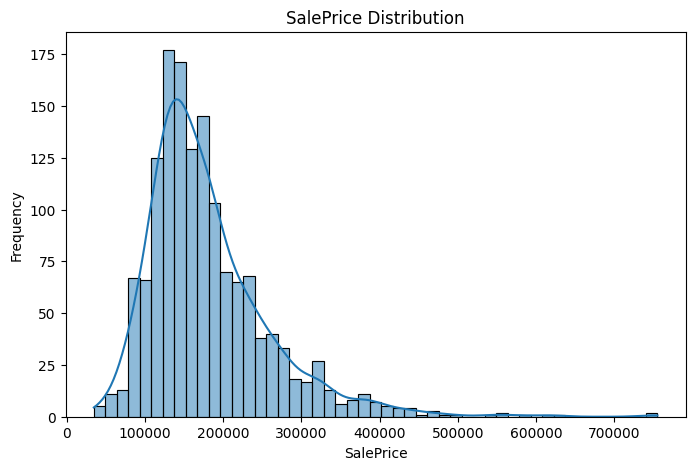

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

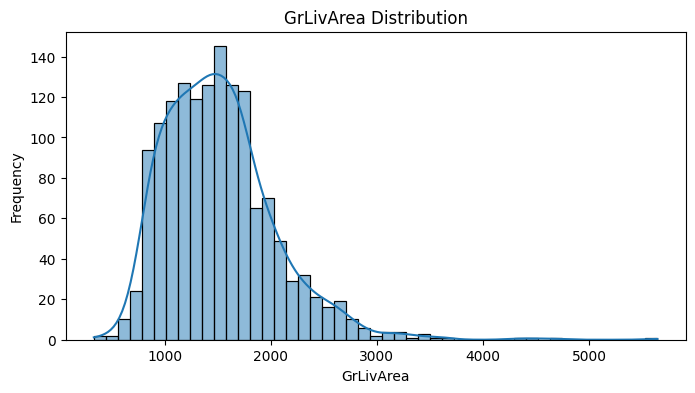

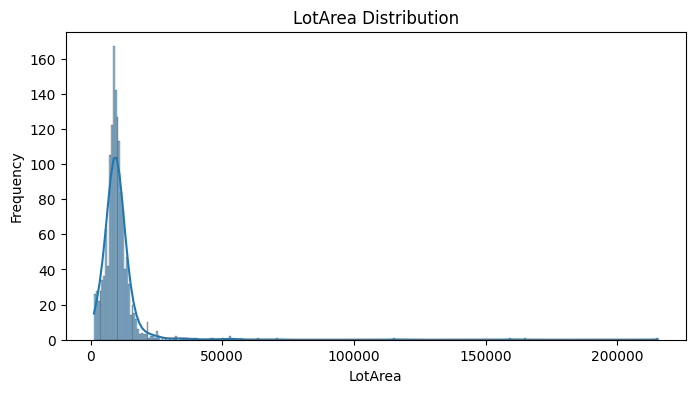

In [72]:
features = ['GrLivArea', 'LotArea']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

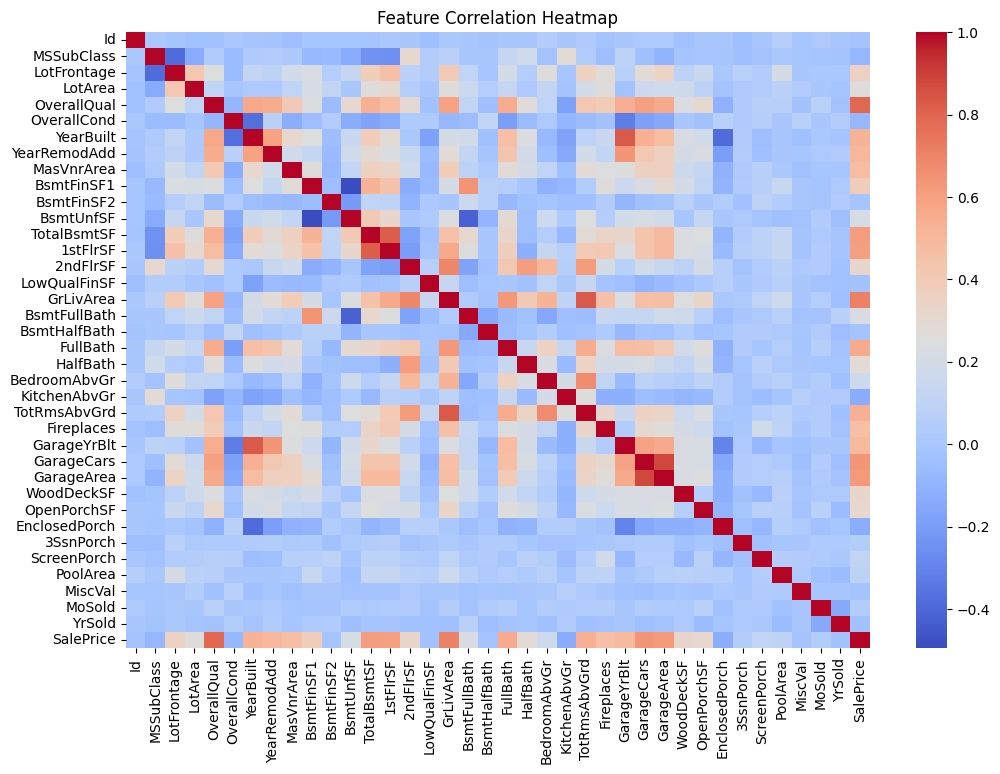

In [73]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [74]:
corr_value = df['OverallQual'].corr(df['GrLivArea'])
print(f"Correlation between OverallQual and GrLivArea: {corr_value:.3f}")


Correlation between OverallQual and GrLivArea: 0.593


In [75]:

df.drop(columns=['PoolQC'], inplace=True)
print("Dropped PoolQC because it has too many missing values and too little variance.")


Dropped PoolQC because it has too many missing values and too little variance.


In [98]:
missing=df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Series([], dtype: int64)


In [77]:
df['MasVnrType']=df['MasVnrType'].fillna('None')
print("Kept MasVnrType: filled missing with 'None'.")


Kept MasVnrType: filled missing with 'None'.


In [78]:
df['FireplaceQu']=df['FireplaceQu'].fillna('None')
print("Kept FireplaceQu: filled missing with 'None'.")

Kept FireplaceQu: filled missing with 'None'.


In [79]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
print("Kept LotFrontage: filled missing with median value.")


Kept LotFrontage: filled missing with median value.


In [108]:
df['GarageType']=df['GarageType'].fillna('None')
print("Kept GarageType: filled missing with 'None'.")

Kept GarageType: filled missing with 'None'.


In [107]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
print("Kept GarageYrBlt: filled missing with 0 to indicate no garage.")
df['GarageQual']=df['GarageQual'].fillna('None')
print("Kept GarageQual: filled missing with None to indicate no garage.")
df['GarageCond']=df['GarageCond'].fillna('None')
print("Kept GarageCond: filled missing with None to indicate no garage.")


Kept GarageYrBlt: filled missing with 0 to indicate no garage.
Kept GarageQual: filled missing with None to indicate no garage.
Kept GarageCond: filled missing with None to indicate no garage.


In [106]:
bsmt_features = ['BsmtQual', 'BsmtCond']
df[bsmt_features] = df[bsmt_features].fillna('None')
print("Kept all basement features: filled missing with 'None' to indicate no basement.")


Kept all basement features: filled missing with 'None' to indicate no basement.


In [105]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
print("Kept MasVnrArea: filled missing with 0 for no masonry veneer.")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0).astype(float)
print("Kept MasVnrArea: filled missing with 0 and converted to float.")


Kept MasVnrArea: filled missing with 0 for no masonry veneer.
Kept MasVnrArea: filled missing with 0 and converted to float.


In [109]:
qual_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['ExterQual'] = df['ExterQual'].map(qual_mapping)
df['KitchenQual'] = df['KitchenQual'].map(qual_mapping)
df['BsmtQual'] = df['BsmtQual'].map(qual_mapping)
df['HeatingQC'] = df['HeatingQC'].map(qual_mapping)
df['ExterCond'] = df['ExterCond'].map(qual_mapping)
df['GarageQual'] = df['GarageQual'].map(qual_mapping)
df['GarageCond'] = df['GarageCond'].map(qual_mapping)
df['BsmtCond'] = df['BsmtCond'].map(qual_mapping)



In [110]:
df = pd.get_dummies(df, columns=[
    'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle',
    'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'PavedDrive', 'SaleCondition'
], drop_first=True)


KeyError: "None of [Index(['LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle',\n       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'PavedDrive',\n       'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [86]:
df.select_dtypes(include='object').columns


Index(['MSZoning', 'Street', 'Alley', 'Utilities', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'RoofMatl', 'MasVnrType', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'MiscFeature', 'SaleType'],
      dtype='object')

In [103]:
df = df.drop(columns=['Alley', 'BsmtFinType2', 'Fence', 'MiscFeature'])
print("Dropped Alley, BsmtFinType2, Fence, MiscFeature, PoolQC: these features have too many missing values or too little variance.")

KeyError: "['Alley', 'BsmtFinType2', 'Fence', 'MiscFeature'] not found in axis"

In [88]:
df = df.drop(['Utilities', 'Street', 'Functional'], axis=1)


In [89]:
df = pd.get_dummies(df, columns=[
    'LandSlope', 'Condition1', 'Condition2', 'BsmtExposure',
    'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical', 'GarageFinish'
], drop_first=True)


In [90]:
df = df.drop(['RoofMatl', 'MasVnrType', 'FireplaceQu'], axis=1)


In [91]:
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Neighborhood', 'GarageType', 'SaleType'], dtype='object')

In [99]:
df.isnull().sum().sort_values(ascending=False).head(20)



Id                       0
Foundation_CBlock        0
Exterior2nd_Other        0
Exterior2nd_Plywood      0
Exterior2nd_Stone        0
Exterior2nd_Stucco       0
Exterior2nd_VinylSd      0
Exterior2nd_Wd Sdng      0
Exterior2nd_Wd Shng      0
Foundation_PConc         0
SaleCondition_Normal     0
Foundation_Slab          0
Foundation_Stone         0
Foundation_Wood          0
PavedDrive_P             0
PavedDrive_Y             0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
Exterior2nd_MetalSd      0
Exterior2nd_ImStucc      0
dtype: int64

In [100]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_RFn,GarageFinish_Unf
0,1,60,RL,65.0,8450,CollgCr,7,5,2003,2003,...,False,False,False,True,False,False,False,True,True,False
1,2,20,RL,80.0,9600,Veenker,6,8,1976,1976,...,False,False,False,True,False,False,False,True,True,False
2,3,60,RL,68.0,11250,CollgCr,7,5,2001,2002,...,False,False,False,True,False,False,False,True,True,False
3,4,70,RL,60.0,9550,Crawfor,7,5,1915,1970,...,False,False,False,True,False,False,False,True,False,True
4,5,60,RL,84.0,14260,NoRidge,8,5,2000,2000,...,False,False,False,True,False,False,False,True,True,False


In [101]:
df.dtypes.value_counts()


bool       104
int64       39
object       8
float64      3
Name: count, dtype: int64

In [113]:
print(df.dtypes[df.dtypes == 'object'])


Series([], dtype: object)


In [111]:
df = pd.get_dummies(df, columns=[
    'MSZoning', 'Neighborhood', 'GarageType', 'SaleType'
], drop_first=True)


In [112]:
quality_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0
}

df['BsmtQual'] = df['BsmtQual'].map(quality_map)
df['BsmtCond'] = df['BsmtCond'].map(quality_map)
df['GarageQual'] = df['GarageQual'].map(quality_map)
df['GarageCond'] = df['GarageCond'].map(quality_map)


In [117]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (1460, 191)
Target shape: (1460,)


In [118]:
print(X.dtypes[X.dtypes == 'object'])

Series([], dtype: object)


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [129]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [127]:
missing = X.isnull().sum()
missing = missing[missing > 0]
print(missing)


Series([], dtype: int64)


In [125]:
fill_cols = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for col in fill_cols:
    X[col] = X[col].fillna("TA")


In [126]:
quality_map = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
for col in fill_cols:
    X[col] = X[col].map(quality_map)


In [130]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))


Train RMSE: 25570.075437263487
Test RMSE: 33455.84088009215
Train R²: 0.8903808809990296
Test R²: 0.8540748778135064


C:\Users\Raghav Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Raghav Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [131]:
feature_importance = pd.Series(model.coef_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))


Exterior2nd_ImStucc      80908.442039
GarageType_None          72114.470364
Neighborhood_StoneBr     51157.421756
Neighborhood_NridgHt     48315.177990
Exterior1st_Stone        40714.143663
                            ...      
BldgType_Twnhs          -54914.093236
Heating_OthW            -60420.522969
Condition2_RRAe         -69431.532580
Exterior1st_ImStucc     -98348.486046
Condition2_PosN        -194109.056151
Length: 191, dtype: float64


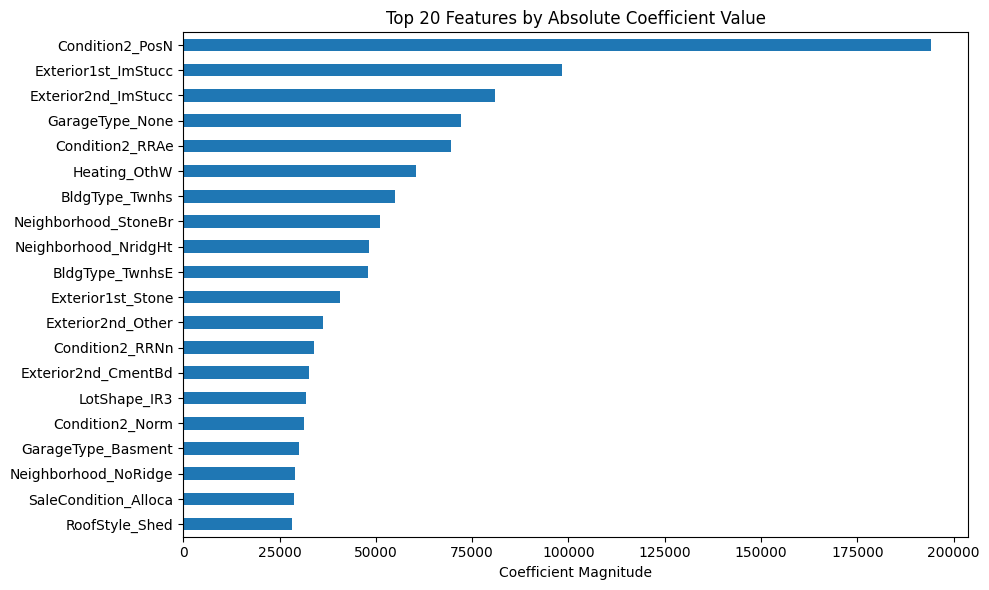

In [133]:
coef = pd.Series(model.coef_, index=X_train.columns)
top_features = coef.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind="barh")
plt.title("Top 20 Features by Absolute Coefficient Value")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [134]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=100)  # try alpha=1, 10, 100 to see impact
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Ridge Train RMSE: {train_rmse:.2f}")
print(f"Ridge Test RMSE: {test_rmse:.2f}")
print(f"Ridge Train R²: {train_r2:.4f}")
print(f"Ridge Test R²: {test_r2:.4f}")


Ridge Train RMSE: 30199.89
Ridge Test RMSE: 33569.35
Ridge Train R²: 0.8471
Ridge Test R²: 0.8531


C:\Users\Raghav Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Raghav Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


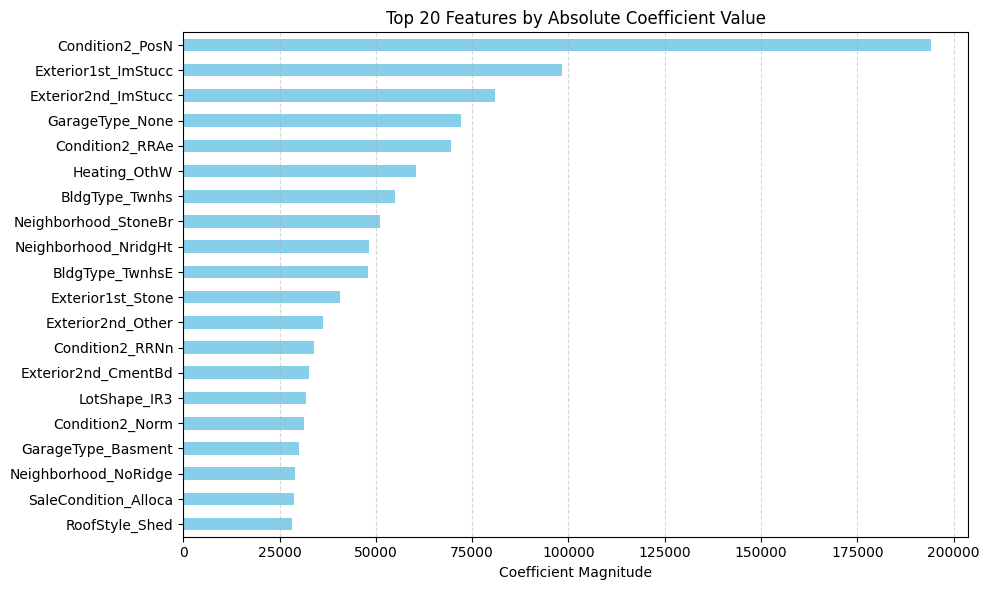

In [135]:
import matplotlib.pyplot as plt

# Sort by absolute value, pick top 20
top_features = coef.abs().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind="barh", color="skyblue")
plt.title("Top 20 Features by Absolute Coefficient Value")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
